# Mandelbrot Orbit Trap Shading
October 13, 2022

An orbit trap is a method for smooth shading fractals. The idea of an orbit trap is to measure the distance of an orbit from some reference object at each step of the iteration.

In this document a point is used as the orbit trap reference.

In [1]:
using Images
using PyPlot
using LinearAlgebra

In [2]:
const MAX_ITERATIONS = 100

100

In [3]:
function iter(c::Complex{Float64}, trap::Complex{Float64})
    """
    Iterates the given point until the modulus of the value becomes > 2,
    or MAX_ITERATIONS is reached. Also measures the minimum distance of
    the orbit from the input trap point.
    
    Returns a tuple with (iterations, dist) where
        iterations = number of iterations for this point
        dist = minimum distance of the orbit to the trap
    """
    z = 0.0 + 0.0im
    dist = 9.0e20
    count = 0
    while count < MAX_ITERATIONS
        z1 = z^2 + c
        dist = min(dist, abs(trap-z1))
        modu = abs2(z1)
        if modu > 2.0
            break
        end

        z = z1
        count += 1
    end

    return count, dist
end

iter (generic function with 1 method)

In [4]:
struct Bounds
    x1::Float64
    x2::Float64
    y1::Float64
    y2::Float64
end

In [5]:
function compute_mandelbrot(nx::Int, ny::Int, bound::Bounds, trap::Complex{Float64})
    """
    Compute the mandelbrot set
    
    Returns a tuple (counts, dist) with the iteration counts and
    distances to the trap, for each point
    """
    counts = zeros(Int64,ny,nx)
    dists = zeros(Float64,ny,nx)
    
    dx = (bound.x2 - bound.x1) / nx
    dy = (bound.y2 - bound.y1) / ny

    for i = 1:nx
        x = bound.x1 + (i - 0.5)*dx
        for j = 1:ny
            y = bound.y1 + (j - 0.5)*dy
            # Invert the Y coordinates because graphics start at the
            # top with y = 0 and go down for positive values
            counts[ny-j+1,i], dists[ny-j+1,i] = iter(x + y*im, trap)
        end
    end
    
    return counts, dists
end

compute_mandelbrot (generic function with 1 method)

In [6]:
function calc_image_autoscale(xpixels::Int64, ypixels::Int64,
        bounds::Bounds, trap::Complex{Float64})
    #=
    Calculate the Mandelbrot set with a point orbit trap, and apply
    automatic color scaling to the distances to be in range [0,1].
    
    Returns an array of floats in the range[0,1] that can be
    plotted directly as an image.
    =#
    counts, dists = compute_mandelbrot(xpixels, ypixels, bounds, trap);

    # Normalize the distances in the range [0,1]
    min_dist = 1.0e20
    max_dist = 0.0
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        if dists[i,j] < min_dist
            min_dist = dists[i,j]
        end
        if dists[i,j] > max_dist
            max_dist = dists[i,j]
        end
    end

    # Compute the color scaling and apply to the image
    scale = 1.0 / (max_dist - min_dist)
    println("Distance min $min_dist, max $max_dist, scale $scale")
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        dists[i,j] = (dists[i,j] - min_dist)*scale
    end

    return dists
end

calc_image_autoscale (generic function with 1 method)

Here are list of colormap names:

'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c'

Distance min 0.0013849440992465512, max 2.418257402197138, scale 0.41375786986583996
  0.337679 seconds (110.86 k allocations: 25.444 MiB, 16.79% compilation time: 51% of which was recompilation)


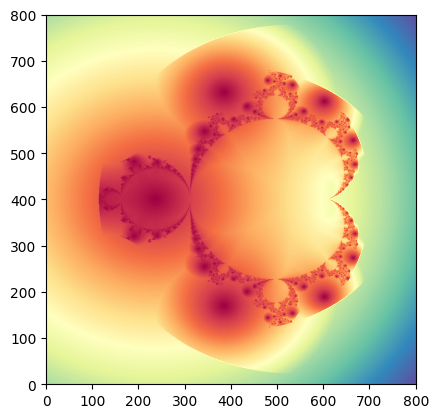

In [7]:
xpixels = 800
ypixels = 800
trap = -1.0+0im
bounds = Bounds(-1.8, 0.9, -1.5, 1.5)
@time img = calc_image_autoscale(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

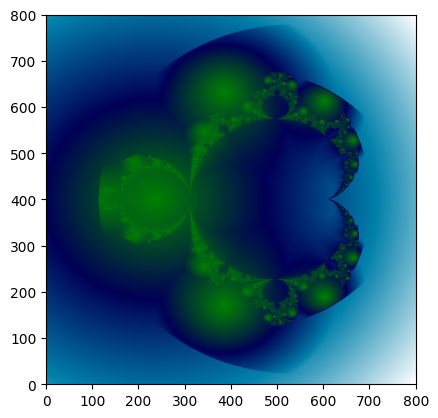

In [8]:
imshow(img, cmap="ocean", extent=[0, xpixels, 0, ypixels]);

Let's try starting with a fixed trap point and zoom into an area of interest.

Distance min 0.0014001327613526358, max 3.7511573365137925, scale 0.26668393329554363


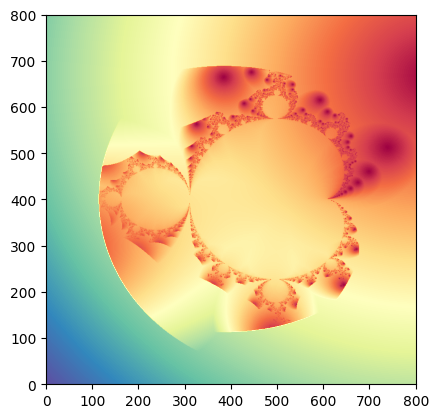

In [9]:
trap = 1.0+1.0im
bounds = Bounds(-1.8, 0.9, -1.5, 1.5)
img = calc_image_autoscale(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Distance min 0.002056471427554461, max 1.2191140859059733, scale 0.8216537886980471


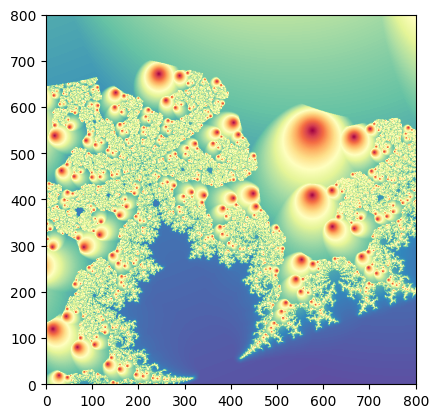

In [10]:
bounds = Bounds(-0.4, -0.3, 0.6, 0.7)
img = calc_image_autoscale(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Notice that the coloring has changed considerably from the first image to the image above. This is due to the scaling factor being adjusted according to the actual calculated distances within the precribed bounds.

Distance min 0.0008878288098085755, max 1.142042506369176, scale 0.8763053945839662


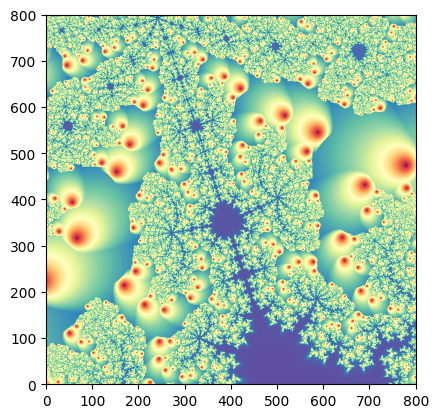

In [11]:
bounds = Bounds(-0.38, -0.36, 0.64, 0.66)
img = calc_image_autoscale(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Distance min 0.0026537156573412843, max 1.1295274793890628, scale 0.8874108459925713


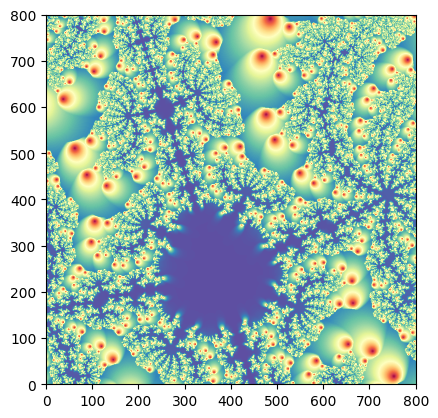

In [12]:
bounds = Bounds(-0.373, -0.367, 0.647, 0.653)
img = calc_image_autoscale(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

## Fixed scaling

The following function uses fixed scaling so that the color scaling can be kept the same across all zoomed images.

In [13]:
function calc_image_fixed_scale(xpixels::Int64, ypixels::Int64,
        bounds::Bounds, trap::Complex{Float64},
        offset::Float64, scale::Float64)
    #=
    Calculate the Mandelbrot set with a point orbit trap, and apply
    the specified color scaling to the distances.
    =#
    counts, dists = compute_mandelbrot(xpixels, ypixels, bounds, trap);

    # Normalize the distances in the range [0,1]
    min_dist = 1.0e20
    max_dist = 0.0
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        if dists[i,j] < min_dist
            min_dist = dists[i,j]
        end
        if dists[i,j] > max_dist
            max_dist = dists[i,j]
        end
    end

    # Apply color scaling to the image
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        cvalue = scale * (dists[i,j] - offset)
        dists[i,j] = max(cvalue, 0.0)
        dists[i,j] = min(cvalue, 1.0)
    end

    return dists
end

calc_image_fixed_scale (generic function with 1 method)

  0.278430 seconds (1.61 k allocations: 19.739 MiB)


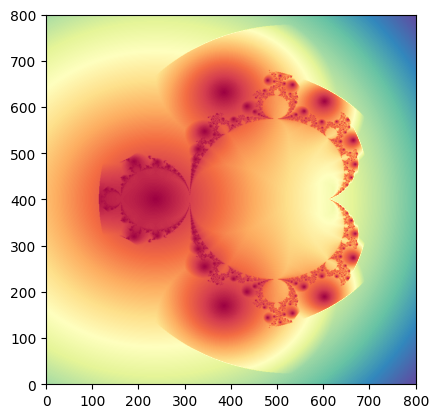

In [14]:
trap = -1.0+0im
bounds = Bounds(-1.8, 0.9, -1.5, 1.5)
offset = 0.00138
scale = 0.418
@time img = calc_image_fixed_scale(xpixels, ypixels, bounds, trap, offset, scale);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Try zooming in to see if the colors remain consistemt.

  0.545461 seconds (2.17 k allocations: 19.773 MiB, 1.51% gc time, 0.58% compilation time)


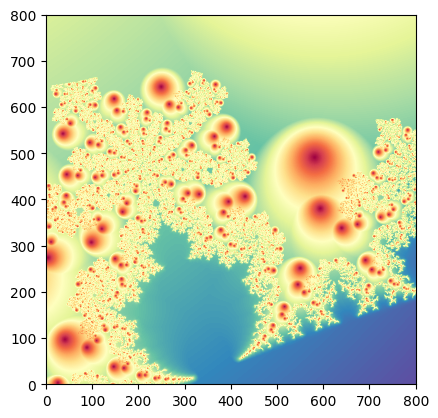

In [15]:
bounds = Bounds(-0.4, -0.3, 0.6, 0.7)
@time img = calc_image_fixed_scale(xpixels, ypixels, bounds, trap, offset, scale);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Fixed scaling helped a little, but didn't completely solve the issue.

## Log scaling

Try logarithmic scaling.

In [16]:
function calc_image_log(xpixels::Int64, ypixels::Int64,
        bounds::Bounds, trap::Complex{Float64})
    #=
    Calculate the Mandelbrot set with a point orbit trap, and apply
    automatic color scaling to the distances to be in range [0,1].
    =#
    counts, dists = compute_mandelbrot(xpixels, ypixels, bounds, trap);

    # Normalize the distances in the range [0,1]
    min_dist = 1.0e20
    max_dist = -1.0e20  #0.0
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        dists[i,j] = log(dists[i,j])
        if dists[i,j] < min_dist
            min_dist = dists[i,j]
        end
        if dists[i,j] > max_dist
            max_dist = dists[i,j]
        end
    end

    # Compute the color scaling and apply to the image
    scale = 1.0 / (max_dist - min_dist)
    println("Dist min $min_dist, max $max_dist, scale $scale")
    for i in eachindex(dists[:,1]), j in eachindex(dists[1,:])
        dists[i,j] = (dists[i,j] - min_dist)*scale
    end

    return dists
end

calc_image_log (generic function with 1 method)

Dist min -6.582095501712222, max 0.8830471990484957, scale 0.13395591217540925
  0.305280 seconds (1.64 k allocations: 19.741 MiB)


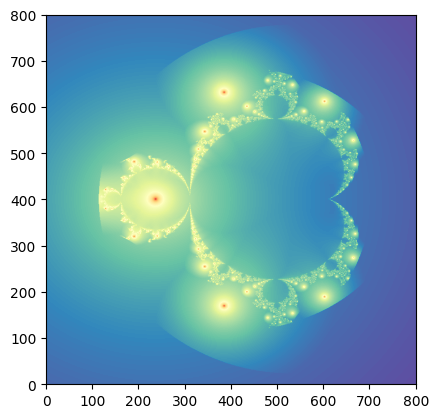

In [17]:
trap = -1.0+0im
bounds = Bounds(-1.8, 0.9, -1.5, 1.5)
@time img = calc_image_log(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Dist min -7.530645705275738, max -0.7086036218306465, scale 0.1465836750592142
  0.564329 seconds (1.64 k allocations: 19.741 MiB)


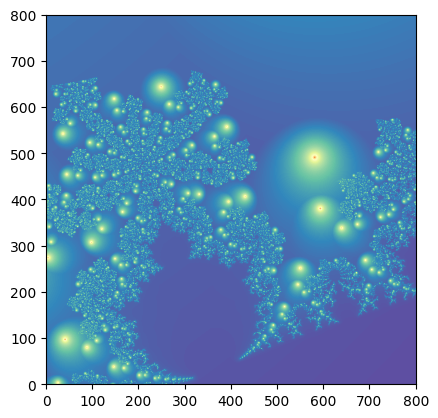

In [18]:
bounds = Bounds(-0.4, -0.3, 0.6, 0.7)
@time img = calc_image_log(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Dist min -8.23503355561862, max -0.922025386930809, scale 0.13674263407522383
  0.793169 seconds (1.64 k allocations: 19.741 MiB, 0.93% gc time)


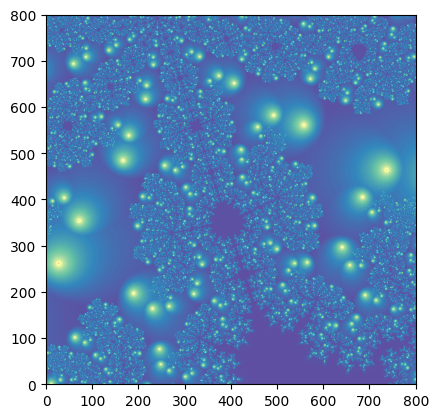

In [19]:
bounds = Bounds(-0.38, -0.36, 0.64, 0.66)
@time img = calc_image_log(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);

Dist min -7.534362511071545, max -0.9490921351945388, scale 0.1518540535044961
  0.992627 seconds (1.64 k allocations: 19.741 MiB)


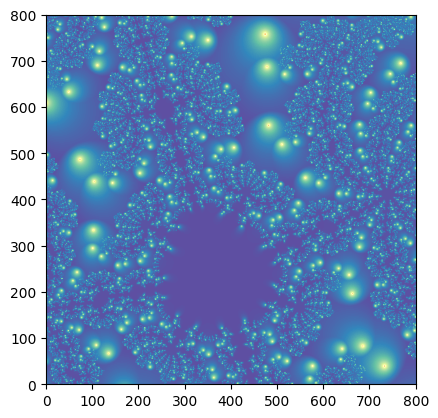

In [20]:
bounds = Bounds(-0.373, -0.367, 0.647, 0.653)
@time img = calc_image_log(xpixels, ypixels, bounds, trap);
imshow(img, cmap="Spectral", extent=[0, xpixels, 0, ypixels]);